<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.3.0     ) [CRAN]
distribut... (NA -> 0.4.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.2     ) [CRAN]
abind        (NA -> 1.4-5     ) [CRAN]
posterior    (NA -> 1.6.0     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpoEE6nX/remotes35a5b490d30/stan-dev-cmdstanr-895e1d0/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpoEE6nX/remotes35a78bf529e/rmcelreath-rethinking-f3ac8de/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.40.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.1346773,0.2202882,-0.4892557,0.2084898,1.003528,183.3369
b,0.6149489,0.2408112,0.2363190,1.0090680,1.000769,298.3652


# Chapter 11

## Easy

### 11E1
If an event has probability 0.35, what are the log-odds of this event?

#### Answer
We just need to definition of log odds.
> $\text{Odds} = \frac{p}{1-p}$

> $\text{log-Odds} = \text{ln}\left(\frac{p}{1-p}\right)$

So for our problem
> $\text{log-Odds}(0.35) = \text{ln}\left(\frac{0.35}{1-0.35}\right)
= \text{ln}\left(\frac{0.35}{0.65}\right) \approx -0.62$

In [ ]:
log(0.35 / (1-0.35))

[1] -0.6190392

### 11E2
If an event has log-odds 3.2, what is the probability of this event?

#### Answer
We can find this in R pretty easily:

In [ ]:
logistic(3.2)

[1] 0.9608343

But I think it's worth knowing to calculate this by hand.

> $\text{log-odds} = 3.2 = \text{ln}\left(\frac{p}{1-p}\right)
\rightarrow e^{3.2} = \frac{p}{1-p}
\rightarrow (1-p)e^{3.2} = e^{3.2} - pe^{3.2} = p
\rightarrow e^{3.2} = p + pe^{3.2} = p(1 + e^{3.2})
\rightarrow p = \frac{e^{3.2}}{1 + e^{3.2}} \approx 0.961 $

### 11E3
Suppose that a coefficient in a logistic regression has value 1.7. What does this imply about  the proportional change in odds of the outcome?

#### Answer
First on the *log-odds* scale, a coefficient of 1.7 means that the log-odds increases *additively* by 1.7 for a one-unit increase in the corresponding predictor variable: $\text{ln}\left(\frac{p}{1-p}\right) = ... + 1.7x$.  To get this to the *odds* scale, we exponentiate both sides: $\frac{p}{1-p} = ... \times e^{1.7x}$ such that the odds increase *multiplicatively* by $e^{1.7}$ for a one-unit increase in $x$.

### 11E4
Why do Poisson regressions sometimes require the use of an *offset*?  Provide an example.

#### Answer
In short, an offset is required when the outcome is something like a rate--a fraction where the numerator is the number of events and the denominator is something like attempts, space, time, or exposure--where the value of the denominator may vary among observations.  In this case, our model might look like

$$g\left(\frac{y}{m}\right) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

The problem is that we don't have a GLM that can accomodate fractional outcomes.  But say we take $g(.)$ to be $\text{ln}(.)$; then we have

$$\text{ln}\left(\frac{y}{m}\right) = \text{ln}(y) - \text{ln}(m) = \alpha + \beta_1 x_1 + ... + \beta_p x_p$$.

Now we can take $\text{ln}(m)$ over to the other side to get

$$\text{ln}(y) = \text{ln}(m) + \alpha + \beta_1 x_1 + ... + \beta_p x_p$$

where $\text{ln}(m)$ is the offset.  So what we're left with is a Poisson regression with an offset.

## Medium

### 11M1
As explained in the chapter, binomial data can be organized in aggregated and disaggregated  forms, without any impact on inference. But the likelihood of the data does change when the data are  converted between the two formats. Can you explain why?

#### Answer
From the chimpanzee example in the chapter, aggregated data may look like

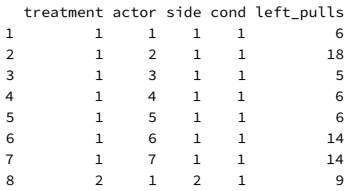

where the outcome `left_pulls` is a sum of "successes" across trials.  Conversely, disaggregated data may look like

|treatment|actor|side|cond|left_pull|
|---------|-----|----|----|---------|
|1|1|1|1|0|
|1|1|1|1|0|
|1|1|1|1|1|
|...|...|...|...|...|
|2|7|2|4|1|

where each trial is described on a single line.

These data formats require different likelihoods.  Both can use binomial likelihoods, but the aggregated data must account for the fact that multiple trials are represented in a single row like `left_pulls ~ dbinom(18, p)`, while the disaggregated data does not (`left_pull ~ dbinom(1, p)`).  In math notation, the disaggregated likelihood looks like $p^y(1-p)^{1-y}$ while the aggregated likelihood looks like $\frac{y!}{y!(n-y)!}p^y(1-p)^{n-y}$ $y$ is the outcome and $n=18$ is the number of trials.

### 11M2
If a coefficient in a Poisson regression has value 1.7, what does this imply about the change in the outcome?

#### Answer
Let's get aquainted with the Poisson regression; for illustration, we'll assume a single intercept and a single explanatory variable $X$:
$$ y \sim Poisson(\lambda)$$
$$ \text{ln}(\lambda) = \alpha + \beta x$$

So we can rewrite the linear model as
$$ \lambda = \text{exp}(\alpha + \beta x) = e^\alpha e^{\beta x}$$

So what happens to $\lambda$ when $x$ increases by 1 unit?  How does $\lambda_{x+1}$ compare with $\lambda_x$?
$$\frac{\lambda_{x+1}}{\lambda_x} = \text{exp}[(\alpha + \beta (x+1)) - (\alpha + \beta x)] = \frac{\text{exp}(\alpha + \beta (x+1))}{\text{exp}(\alpha + \beta x)} = \frac{e^\alpha e^{\beta (x+1)}}{e^\alpha e^{\beta x}} = \frac{e^{\beta x+ \beta}}{e^{\beta x}} = \frac{e^{\beta x} e^{\beta}}{e^{\beta x}} = e^\beta$$

Thus, a 1-unit change in $X$ results in an $e^\beta$ change in $\lambda_{x+1}$ compared to $\lambda_x$.  Here, if $\beta = 1.7$, there is proportional change to $\lambda_{x+1}$ of $e^{1.7} \approx 5.47$

### 11M3 and 11M4
Explain why the logit link is appropriate for a binomial generalized linear model.

Explain why the log link is appropriate for a Poisson generalized linear model.

#### Answers
Logistic regression is generally used to model parameters, $p$, that is constrained between [0,1].  The logit link, $\text{ln}\frac{p}{1-p}$, achieves this by mapping values of our linear function $X \beta$ to values of [0,1].

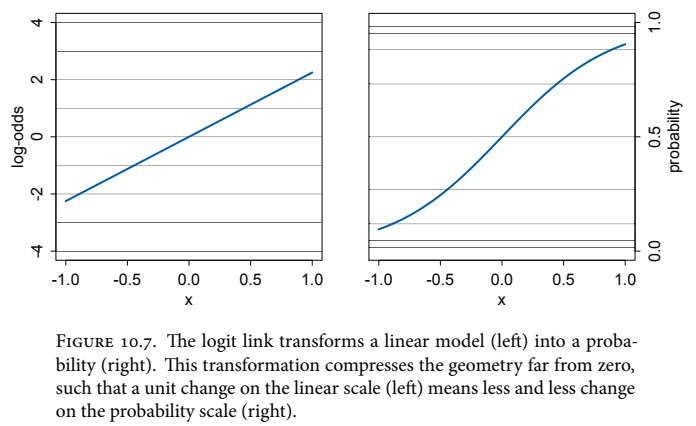

Similarly, Poisson regression is used to model parameters, $\lambda$, that are non-negative.  The log link function, $\text{ln}(\lambda)$ achieves this by mapping values of our linear function $X\beta$ to values $\ge 0$.

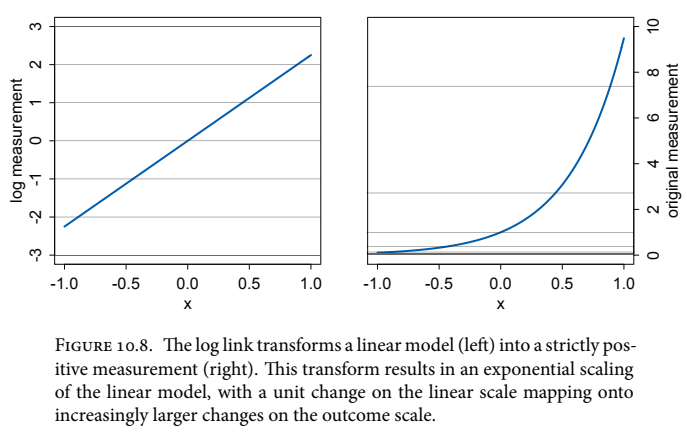

### 11M5
What would it imply to use a logit link for the mean of a Poisson generalized linear model?  Can you think of a real research problem for which this would make sense?

#### Answer
Let's first see what such a model would look like:

$$y \sim Poisson(\lambda)$$
$$\text{logit}(\lambda) = \text{ln}\frac{\lambda}{1 - \lambda} = X\beta$$

This would imply that the expected value of $y$, $\lambda$, would be bound between [0,1].

To be honest, I cannot think of a reason that this would be used in practice...

### 11M6
State the constraints for which the binomial and Poisson distributions have maximum entropy. Are the constraints different at all for binomial and Poisson? Why or why not?

#### Answer
I'm working on a writeup about MaxEnt.  The basic idea of MaxEnt is to maximize entropy

$$H = -\sum_{i=1}^n p(x_i) \times \text{ln}(p(x_i))$$

subject to some set of constraints, where each constraint $c$ is expressed like

$$c_m: E[g_m(X)] = \sum_a^b p(x_i) g_m(x_i) \ \text{or} \ \int_a^b p(x) g_m(x) dx$$

One of these constraints is always

$$c_1: \sum_{x=-\infty}^{\infty} p(x) = 1 \ \text{or} \ \int_{x=-\infty}^{\infty} p(x) \ dx = 1$$

which is just a fact about probability: *total probability always sums to 1*.  Here, $g_m(X) = 1$.

If we assume that $X$ is a discrete variable that is $\ge 0$, which is the case for both binomial and Poisson distributions, we can rewrite

$$c_1: \sum_{x=0}^{\infty} p(x) = 1$$

Since the binomial distribution only includes values of 0 or 1, we can rewrite

$$c_1^{\text{binomial}}: \sum_{x=0}^{1} p(x) = 1 , \ c_1^{\text{Poisson}}: \sum_{x=0}^{\infty} p(x) = 1$$

If we can assume that the distribution has a mean, we can impose a second constraint

$$c_2: \sum_{i=1}^n p(x_i) \times x_i = \bar{X}$$

which is just the definition of the arithmetic mean.  The binomial distibution has $\bar{X}_{\text{binomial}} = np$ while the Poisson distribution has $\bar{X}_{\text{Poisson}} = \lambda$.  Actually, as $n$ gets large, $\lambda \approx np$.  So the two distributions are closely related.

Without getting too far into the math, these terms get wrapped up into an expression called the [Lagrangian](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction) like

$$𝓛 = H - \phi \left(\sum_{x=0}^{\infty} p(x) - 1 \right) - \psi \left(\sum_{i=1}^n p(x_i) \times x_i - \bar{X} \right)$$

where $\phi$ and $\psi$ are "Lagrange multipliers".  For each $n$ Lagrangians, we solve for $p(x_i)$ by taking all partial derivatives of $𝓛$ with respect to $p(x_i)$ and setting equal to 0; $\phi$ and $\psi$ can be found along the way. The outcome of this, given our constraints, are the binomial and Poisson distributions.

Importantly, notice that all of this implies that each observation $x_i$ is independent, and $p(X=x)$ is constant across trials.

### 11M7

Use `quap` to construct a quadratic approximate posterior distribution for the chimpanzee model that includes a unique intercept for each actor, `m11.4` (page 330). Compare the quadratic approximation to the posterior distribution produced instead from MCMC. Can you explain both the differences and the similarities between the approximate and the MCMC distributions? Relax the  prior on the actor intercepts to Normal(0,10). Re-estimate the posterior using both `ulam` and `quap`. Do the differences increase or decrease? Why?

#### Answer
Let's prepare the data first.

In [ ]:
data(chimpanzees)
d <- chimpanzees
d$treatment <- 1 + d$prosoc_left + 2*d$condition
dat_list <- list(pulled_left = d$pulled_left,
                 actor = d$actor,
                 treatment = as.integer(d$treatment))

Now we'll run the `ulam` and `quap` versions of the model from the chapter.

In [ ]:
m11.4_ulam <- ulam(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list,
     chains=4,
     cores=4)

m11.4_quap <- quap(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list)

  cbind(round(precis(m11.4_ulam, depth=2),2)[,1:2],
      round(precis(m11.4_quap, depth=2),2)[1:2])

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 4

,mean,sd,mean,sd
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.41,0.32,-0.44,0.33
a[2],3.92,0.74,3.71,0.72
a[3],-0.73,0.33,-0.73,0.33
a[4],-0.73,0.33,-0.73,0.33
a[5],-0.42,0.33,-0.44,0.33
a[6],0.51,0.33,0.47,0.33
a[7],1.98,0.41,1.91,0.41
b[1],-0.07,0.28,-0.04,0.28
b[2],0.46,0.28,0.47,0.28


The differences are negligible, but there *are* differences.  Some of this will have to do with the randomness in the run of the models.  But some almost has to do with the fact that quadratic approximation, `quap`, is confined to using a normal distribution to model `logit(p)`.

These differences are made more obvious when we set `a[actor] ~ dnorm(0,10)`.

In [ ]:
m11.4_ulamb <- ulam(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 10),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list,
     chains=4,
     cores=4)

m11.4_quapb <- quap(
  alist(
  pulled_left ~ dbinom(1 , p),
    logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 10),
      b[treatment] ~ dnorm(0, 0.5)
  ), data=dat_list)

  cbind(round(precis(m11.4_ulamb, depth=2),2)[,1:2],
      round(precis(m11.4_quapb, depth=2),2)[1:2])

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 5

,mean,sd,mean,sd
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.36,0.35,-0.35,0.35
a[2],11.22,5.29,6.99,3.55
a[3],-0.68,0.35,-0.65,0.35
a[4],-0.67,0.35,-0.65,0.35
a[5],-0.35,0.35,-0.35,0.35
a[6],0.59,0.36,0.58,0.35
a[7],2.20,0.47,2.12,0.45
b[1],-0.15,0.30,-0.14,0.30
b[2],0.39,0.30,0.38,0.30


There is only 1 term that is very different, `a[2]`.  Why does the looser prior lead to this?  Because the more-permissve prior now entertains extreme values.  On the logit scale, extreme values skew to larger values; but for the normal distribution, the increased variance is spread evenly around the mean.

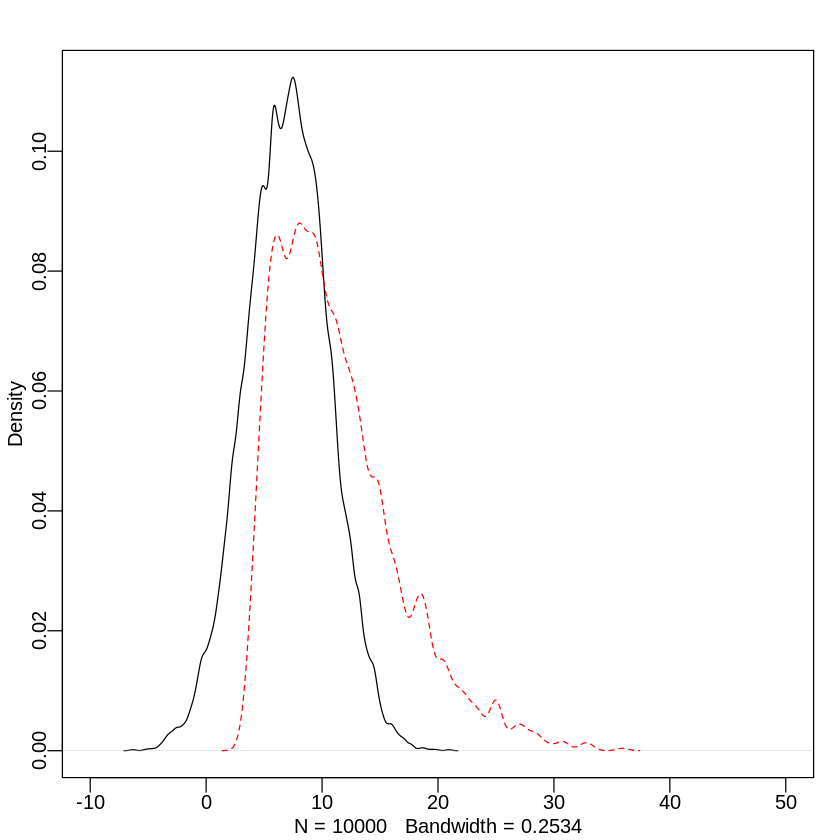

In [ ]:
post_ulam <- extract.samples(m11.4_ulamb)
post_quap <- extract.samples(m11.4_quapb)

dens(post_quap$a[,2], xlim=c(-10, 50))
dens(post_ulam$a[,2], col="red", lty=2, add=TRUE)

### 11M8
Revisit the `data(Kline)` islands example. This time drop Hawaii from the sample and refit the models. What changes do you observe?

#### Answer
Let's start by getting the original output on the full dataset.

In [ ]:
data(Kline)
d <- Kline
d$P <- standardize(log(d$population))
d$contact_id <- ifelse(d$contact=="high", 2, 1)

d_list <- list(T = d$total_tools,
               P = d$P,
               cid = d$contact_id)

m11.10 <- ulam(
  alist(
    T ~ dpois(lambda),
      log(lambda) <- a[cid] + b[cid]*P,
        a[cid] ~ dnorm(3, 0.5),
        b[cid] ~ dnorm(0, 0.2)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Now we'll get the truncated dataset and run the model on that.

In [ ]:
data(Kline)
d <- Kline
d2 <- d[d$culture != "Hawaii", ]
d2$P <- standardize(log(d2$population))
d2$contact_id <- ifelse(d2$contact=="high", 2, 1)

d2_list <- list(T = d2$total_tools,
                P = d2$P,
                cid = d2$contact_id)

m11.10b <- ulam(
  alist(
    T ~ dpois(lambda),
      log(lambda) <- a[cid] + b[cid]*P,
        a[cid] ~ dnorm(3, 0.5),
        b[cid] ~ dnorm(0, 0.2)
  ), data=d2_list,
     chains=4,
     cores=4,
     iter=1000,
     log_lik=TRUE
)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Now let's plot these with the same code used in the book.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are very high (>1). Set pointwise=TRUE to inspect individual points.



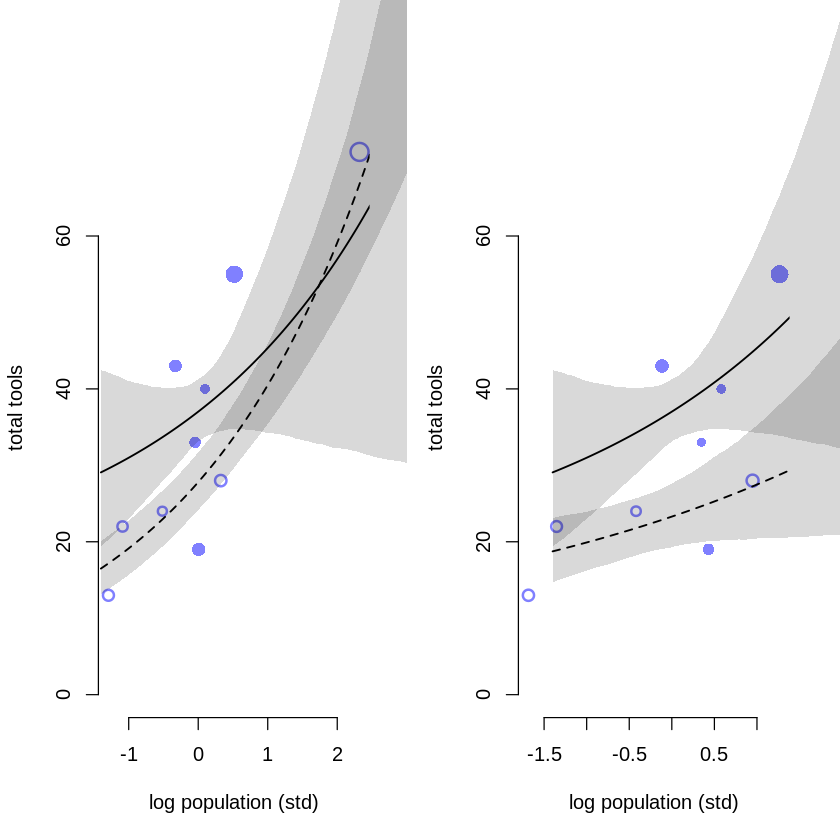

In [ ]:
par(mfrow=c(1,2))

k1 <- PSIS( m11.10, pointwise=TRUE )$k
plot(d_list$P, d_list$T,
     xlab="log population (std)", ylab="total tools",
     col=rangi2, pch=ifelse(d_list$cid==1, 1, 16), lwd=2, cex=1+normalize(k1),
     ylim=c(0,75), bty="n")

#set up the horizontal axis values to compute predictions at
ns <- 100
P_seq <- seq(from=-1.4, to=3, length.out=ns)

#predictions for cid=1 (low contact)
lambda <- link(m11.10, data=data.frame(P=P_seq, cid=1))
lmu <- apply(lambda, 2, mean)
lci <- apply(lambda, 2, PI)
lines(P_seq, lmu, lty=2, lwd=1.5)
shade(lci, P_seq, xpd=TRUE)

#predictions for cid=2 (high contact)
lambda <- link(m11.10, data=data.frame( P=P_seq, cid=2))
lmu <- apply( lambda, 2, mean)
lci <- apply( lambda, 2, PI)
lines( P_seq, lmu, lty=1, lwd=1.5)
shade( lci, P_seq, xpd=TRUE)

################################################################################
k2 <- PSIS(m11.10b, pointwise=TRUE )$k
plot(d2_list$P, d2_list$T,
     xlab="log population (std)", ylab="total tools",
     col=rangi2, pch=ifelse(d2_list$cid==1, 1, 16), lwd=2, cex=1+normalize(k2),
     ylim=c(0,75), bty="n")

#set up the horizontal axis values to compute predictions at
ns <- 100
P_seq <- seq(from=-1.4, to=3, length.out=ns)

#predictions for cid=1 (low contact)
lambda <- link(m11.10b, data=data.frame(P=P_seq, cid=1))
lmu <- apply(lambda, 2, mean)
lci <- apply(lambda, 2, PI)
lines(P_seq, lmu, lty=2, lwd=1.5)
shade(lci, P_seq, xpd=TRUE)

#predictions for cid=2 (high contact)
lambda <- link(m11.10, data=data.frame( P=P_seq, cid=2))
lmu <- apply( lambda, 2, mean)
lci <- apply( lambda, 2, PI)
lines( P_seq, lmu, lty=1, lwd=1.5)
shade( lci, P_seq, xpd=TRUE)

The major difference seems to be that the slope `b[cid]` is not as different between the low- vs high-contact islands, and maybe of opposite ranks.  Let's confirm this with `precis`

In [ ]:
round(precis(m11.10, depth=2),2)
round(precis(m11.10b, depth=2),2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],3.32,0.09,3.18,3.46,1,2104.69
a[2],3.61,0.07,3.50,3.72,1,2190.99
b[1],0.38,0.05,0.29,0.46,1,1933.68
b[2],0.19,0.16,-0.07,0.44,1,2240.00


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],3.14,0.11,2.96,3.32,1.01,1373.02
a[2],3.51,0.10,3.35,3.67,1.00,1166.76
b[1],0.16,0.09,0.00,0.31,1.00,1301.04
b[2],0.21,0.12,0.02,0.41,1.00,1119.94


## Hard

### 11H1
Use WAIC or PSIS to compare the chimpanzee model that includes a unique intercept for each actor, `m11.4` (page 330), to the simpler models fit in the same section. Interpret the results.

#### Answer
Let's copy and paste the data-prep and all models from the chapter.

In [ ]:
data(chimpanzees)
d <- chimpanzees
d$treatment <- 1 + d$prosoc_left + 2*d$condition
dat_list <- list(pulled_left = d$pulled_left,
                 actor = d$actor,
                 treatment = as.integer(d$treatment))

m11.1 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a,
        a ~ dnorm(0, 10)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.2 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a + b[treatment],
        a ~ dnorm(0, 1.5),
        b[treatment] ~ dnorm(0, 10)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.3 <- ulam(
alist(
  pulled_left ~ dbinom(1, p),
    logit(p) <- a + b[treatment],
      a ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

m11.4 <- ulam(
  alist(
    pulled_left ~ dbinom(1, p),
      logit(p) <- a[actor] + b[treatment],
      a[actor] ~ dnorm(0, 1.5),
      b[treatment] ~ dnorm(0, 0.5)
), data=dat_list,
   chains=4,
   cores=4,
   iter=1000,
   log_lik=TRUE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteratio

In [ ]:
compare(m11.1, m11.2, m11.3, m11.4, func=PSIS)
compare(m11.1, m11.2, m11.3, m11.4, func=WAIC)

,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m11.4,531.9557,18.948758,0.0000,NA,8.2953795,1.000000e+00
m11.3,682.4291,9.231043,150.4735,18.42901,3.6121932,2.113984e-33
m11.2,683.0913,9.635207,151.1356,18.47345,4.0185199,1.518168e-33
m11.1,687.8960,7.125581,155.9404,18.95736,0.9779628,1.373985e-34


,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m11.4,531.9045,18.927284,0.0000,NA,8.2698158,1.000000e+00
m11.3,682.4072,9.221572,150.5027,18.42643,3.6012224,2.083359e-33
m11.2,683.0652,9.625205,151.1607,18.47086,4.0054812,1.499271e-33
m11.1,687.8898,7.118391,155.9853,18.95470,0.9748543,1.343476e-34


The model that includes both `actor`-specific and `treatment`-specific terms has superior scores.  This is interesting because this is also the most-penalized model for being the complex; apparently, the complexity is well compensated by predictive ability of the model.

### 11H2
The data contained in `library(MASS)`; `data(eagles)` are records of salmon pirating attempts by Bald Eagles in Washington State. See `?eagles` for details. While one eagle feeds, sometimes another will swoop in and try to steal the salmon from it. Call the feeding eagle the “victim” and  the thief the “pirate.” Use the available data to build a binomial GLM of successful pirating attempts.  

> (a) Consider the following model:  

$$y_i ∼ Binomial(n_i, p_i)$$
$$logit(p_i) = α + β_P P_i + β_V V_i + β_A A_i$$
$$α ∼ Normal(0, 1.5)$$
$$β_P, β_V, β_A ∼ Normal(0, 0.5)$$

> where $y$ is the number of successful attempts, $n$ is the total number of attempts, $P$ is a dummy variable  indicating whether or not the pirate had large body size, $V$ is a dummy variable indicating whether or not the victim had large body size, and finally $A$ is a dummy variable indicating whether or not the pirate was an adult. Fit the model above to the eagles data, using both `quap` and `ulam`. Is the quadratic approximation okay?  

> (b) Now interpret the estimates. If the quadratic approximation turned out okay, then it’s okay to use the quap estimates. Otherwise stick to `ulam` estimates. Then plot the posterior predictions.  Compute and display both (1) the predicted probability of success and its 89% interval for each row ($i$) in the data, as well as (2) the predicted success count and its 89% interval. What different information does each type of posterior prediction provide?  

> (c) Now try to improve the model. Consider an interaction between the pirate’s size and age  (immature or adult). Compare this model to the previous one, using WAIC. Interpret.

#### Answers
Start by getting the `eagles` data up.

In [ ]:
library(MASS)
data(eagles)
d <- eagles

d

,y,n,P,A,V
,<int>,<int>,<fct>,<fct>,<fct>
1,17,24,L,A,L
2,29,29,L,A,S
3,17,27,L,I,L
4,20,20,L,I,S
5,1,12,S,A,L
6,15,16,S,A,S
7,0,28,S,I,L
8,1,4,S,I,S


In order to use the provided model, we should binarize `P`, `A`, and `V`.

In [ ]:
d$P2 <- ifelse(d$P=="L", 1, 0)
d$A2 <- ifelse(d$A=="A", 1, 0)
d$V2 <- ifelse(d$V=="L", 1, 0)

##### Answer to 11H2, a

***Consider the following model:***

***$$y_i ∼ Binomial(n_i, p_i)$$***
***$$logit(p_i) = α + β_P P_i + β_V V_i + β_A A_i$$***
***$$α ∼ Normal(0, 1.5)$$***
***$$β_P, β_V, β_A ∼ Normal(0, 0.5)$$***

***where $y$ is the number of successful attempts, $n$ is the total number of attempts, $P$ is a dummy variable  indicating whether or not the pirate had large body size, $V$ is a dummy variable indicating whether or not the victim had large body size, and finally $A$ is a dummy variable indicating whether or not the pirate was an adult. Fit the model above to the eagles data, using both `quap` and `ulam`. Is the quadratic approximation okay?***

Let's now fit the provided model in `quap` and `ulam`.

In [ ]:
model <- alist(
  y ~ dbinom(n, p),
    logit(p) <- a + bP*P2 + bV*V2 + bA*A2,
      a ~ dnorm(0, 1.5),
      c(bP, bV, bA) ~ dnorm(0,1)
)

m_quap  <- quap(model, data=d)
m_ulam <- ulam(model, data=d, chains=4, cores=4, log_lik=TRUE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In [ ]:
round(precis(m_quap),2)
round(precis(m_ulam),2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.35,0.48,-0.42,1.12
bP,2.58,0.44,1.88,3.28
bV,-2.71,0.47,-3.46,-1.96
bA,0.89,0.41,0.24,1.54


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.35,0.51,-0.43,1.16,1,1110.38
bA,0.93,0.42,0.26,1.59,1,1195.32
bV,-2.78,0.49,-3.58,-1.99,1,1208.56
bP,2.65,0.45,1.95,3.35,1,1133.57


The quadratic approximation, `m_quap`, seems reasonably close to the MCMC approximation, `m_ulam`.  As per the question, then, we should `m_quap` going forward.  But since we have `m_ulam`, I'm going to use that instead.

##### Answer to 11H2, b

***Now interpret the estimates. If the quadratic approximation turned out okay, then it’s okay to use the quap estimates. Otherwise stick to `ulam` estimates. Then plot the posterior predictions.  Compute and display both (1) the predicted probability of success and its 89% interval for each row ($i$) in the data, as well as (2) the predicted success count and its 89% interval. What different information does each type of posterior prediction provide?***

Let's interpret the coefficients from `m_ulam`.  Let's extract samples from the posterior and make inferences from there.

In [ ]:
post <- extract.samples(m_ulam)

We'll start with `a`; this represents the *baseline* chances of success.  Remember that the coefficients are given as log-odds, so let's convert them to probabilities for ease of interpretation.

In [ ]:
quantile(inv_logit(post$a), probs=c(0.055, 0.500, 0.945))

5.5%       50%     94.5% 
0.3934926 0.5862569 0.7605930

Hence, there is a ~58% (89% CrI = ~39%, ~75%) chance of success when all other explanatory variables are set to 0 (small immature pirate, small victim).

To see how different values of the explanatory changes this, we use code like

In [ ]:
quantile(inv_logit(post$a + post$bP), probs=c(0.055, 0.500, 0.945))

5.5%       50%     94.5% 
0.8967739 0.9522835 0.9801712

This gives us the probability that a large immature pirate is successful against a small victim.  We can make estimates for any combination of predictive variables we wish.

Now we're supposed to show the prediction for each scenario presented in the data.  We're meant to do this in 2 ways: *percent success* and *count success*.

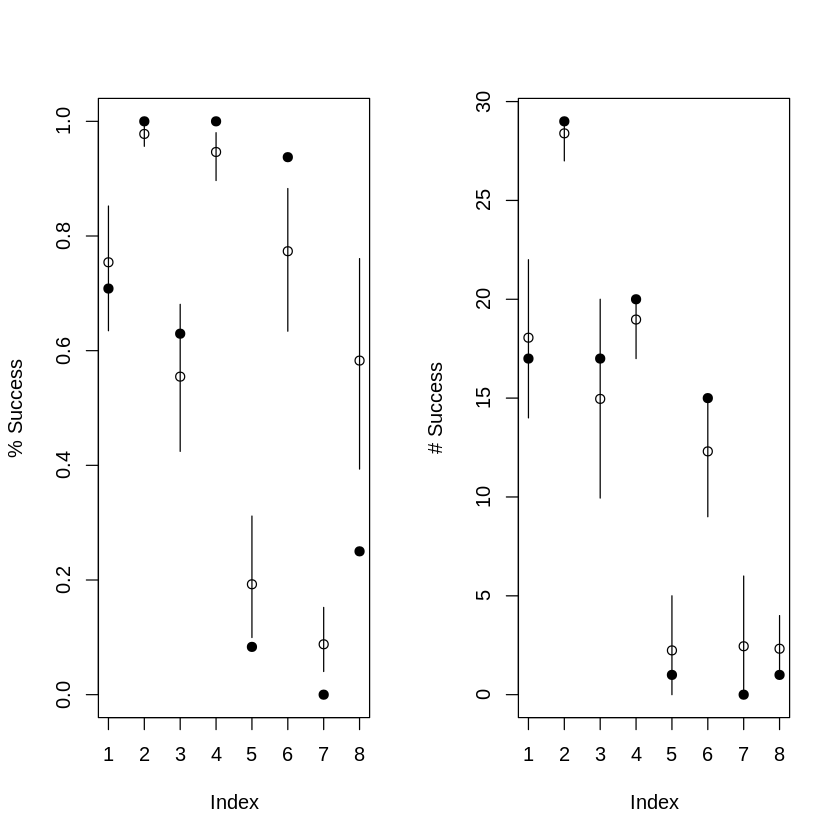

In [ ]:
p_suc <- d$y / d$n
p_pred <- link(m_ulam)
p.mean <- apply(p_pred, 2, mean)
p.PI <- apply(p_pred, 2, PI)

y_sim <- sim(m_ulam)
y.mean <- apply(y_sim, 2, mean)
y.PI <- apply(y_sim, 2, PI)

par(mfrow=c(1,2))
plot(p_suc, ylab="% Success", col="black", pch=19)
points(1:ncol(p_pred), p.mean, col="black")
for(i in 1:nrow(d)){
  lines(c(i,i), p.PI[,i])
}

plot(d$y, ylab="# Success", col="black", pch=19)
points(1:nrow(d), y.mean, col="black")
for(i in 1:nrow(d)){
  lines(c(i,i), y.PI[,i])
}

The two posteriors provide similar information.  However, the *% Success* scale probably provides a better comparison among the conditions because the difference in number of trials is regularized by making using percentages instead of counts.

#### Answer to 11H2, c

***Now try to improve the model. Consider an interaction between the pirate’s size and age  (immature or adult). Compare this model to the previous one, using WAIC. Interpret.***

In [ ]:
m_ulam2 <- ulam(
  alist(
    y ~ dbinom(n, p),
      logit(p) <- a + bP*P2 + bV*V2 + bA*A2 + bPV*P2*V2,
        a ~ dnorm(0, 1.5),
        c(bP, bV, bA, bPV) ~ dnorm(0,1)
  ), data=d,
     chains=4,
     cores=4,
     log_lik=TRUE
)

round(precis(m_ulam2),2)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.41,0.50,-0.42,1.20,1.00,942.65
bPV,0.35,0.67,-0.73,1.45,1.01,833.57
bA,0.91,0.42,0.26,1.58,1.00,1172.51
bV,-2.96,0.54,-3.85,-2.07,1.00,1052.09
bP,2.48,0.60,1.56,3.49,1.01,897.06


In [ ]:
round(compare(m_ulam, m_ulam2, func=PSIS),4)
round(compare(m_ulam, m_ulam2, func=WAIC),4)

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.

Some Pareto k values are high (>0.5). Set pointwise=TRUE to inspect individual points.



,PSIS,SE,dPSIS,dSE,pPSIS,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_ulam,37.9200,6.1100,0.0000,NA,5.4818,0.696
m_ulam2,39.5768,5.9908,1.6568,1.2412,6.5205,0.304


,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_ulam,36.5331,5.3107,0.0000,NA,4.7884,0.599
m_ulam2,37.3355,4.8789,0.8024,1.0509,5.3999,0.401


The models are pretty close--within 1 SE of each other.

### 11H3

The data contained in `data(salamanders)` are counts of salamanders (*Plethodon elongatus*) from 47 different 49-m$^2$ plots in northern California. The column `SALAMAN` is the count in each plot, and the columns `PCTCOVER` and `FORESTAGE` are percent of ground cover and age of trees in the plot, respectively. You will model `SALAMAN` as a Poisson variable.  

> (a) Model the relationship between density and percent cover, using a log-link (same as the example in the book and lecture). Use weakly informative priors of your choosing. Check the quadratic approximation again, by comparing `quap` to `ulam`. Then plot the expected counts and their 89% interval against percent cover. In which ways does the model do a good job? A bad job?  

> (b) Can you improve the model by using the other predictor, `FORESTAGE`? Try any models you think useful. Can you explain why `FORESTAGE` helps or does not help with prediction?

#### Answers
We need to begin by loading the data.

In [ ]:
data(salamanders)
d <- salamanders
head(d)

,SITE,SALAMAN,PCTCOVER,FORESTAGE
,<int>,<int>,<int>,<int>
1,1,13,85,316
2,2,11,86,88
3,3,11,90,548
4,4,9,88,64
5,5,8,89,43
6,6,7,83,368


I personally do not have any sense of priors here, so I'm going to standardize the predictor variables.

In [ ]:
d$P <- standardize(d$PCTCOVER)
d$F <- standardize(d$FORESTAGE)

I should probably also do this for the outcome variable, for the same reason, but then a Poisson regression wouldn't really make sense; so I'll do my best.  I'd guess that a single animal needs some amount of personal space--maybe as little as a 1-m radius to a 25-m radius; and of course, they probably intermingle a bit, so I'll regard the upper range as soft.  Within a 49$^2$-m plot, this is roughly between 1 and 30 salamanders per plot.

##### Answer to 11H3, a

***Model the relationship between density and percent cover, using a log-link (same as the example in the book and lecture). Use weakly informative priors of your choosing. Check the quadratic approximation again, by comparing `quap` to `ulam`. Then plot the expected counts and their 89% interval against percent cover. In which ways does the model do a good job? A bad job?***

I'm not sure how to assign prior here.  It can be hard to intuit since we're working on the log scale.  I alread guessed that 1-30 animals on each plot of land, so that'll help me guess a prior for an intercept.  I also don't know what to expect for the effect of groundcover, but I've standardized the variable so I'll try a $normal (0, 1)$ prior.  Let's simulate these.

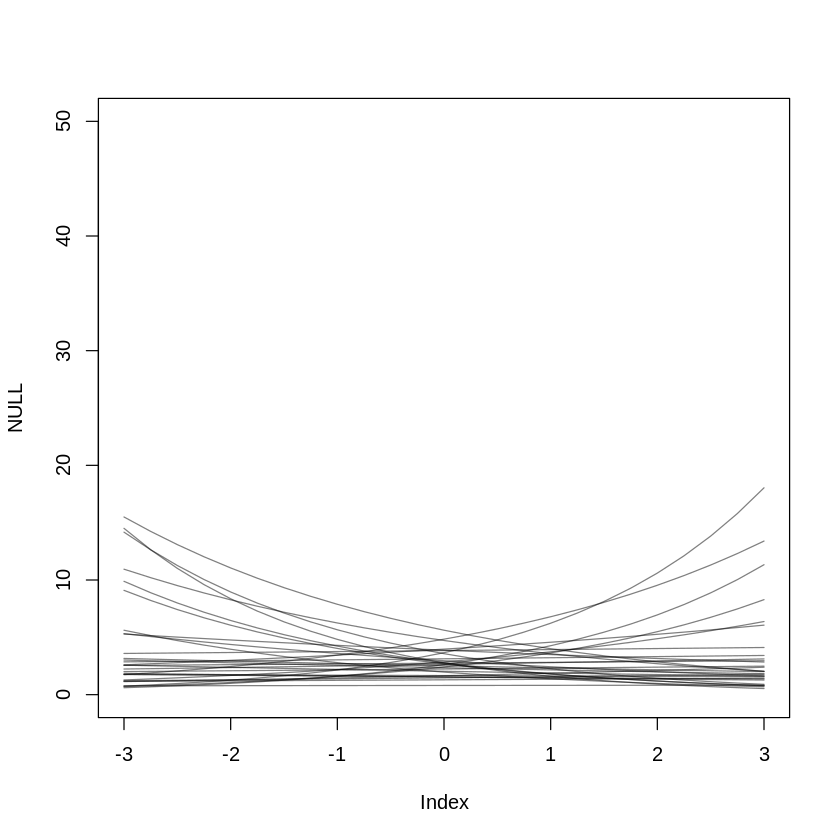

In [ ]:
n <- 30
a_prSim <- rnorm(n, 1, 0.5)
bP_prSim <- rnorm(n, 0, 0.4)

P_sim <- seq( from=-3 , to=3 , length.out=25)

plot( NULL , xlim=c(-3,3) , ylim=c(0,50))
for (i in 1:n){
  lines(P_sim, exp(a_prSim[i] + bP_prSim[i]*P_sim) , col=col.alpha("black", 0.5))
}

After a great many iterations of trials, I arrived at the above priors.  You should play around with this.

Now let's get our `quap` and `ulam` models underway.

In [ ]:
model <- alist(
  SALAMAN ~ dpois(lambda),
    log(lambda) <- a + bP*P,
      a ~ dnorm(1, 0.5),
      bP ~ dnorm(0, 0.4)
)

m_quap <- quap(model, data=d)
m_ulam <- ulam(model, data=d, chains=4, cores=4)

round(precis(m_quap),4)
round(precis(m_ulam),4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.5813,0.1252,0.3812,0.7815
bP,0.9435,0.1475,0.7077,1.1793


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.5637,0.1312,0.3444,0.7646,1.0049,519.5720
bP,0.9619,0.1510,0.7285,1.2066,1.0007,714.6142


The `quap` model seems to be doing okay comparing to the `ulam` model.

Let's move forward with just the `ulam` model.  Now we're supposed to plot the predictions against the actual data.

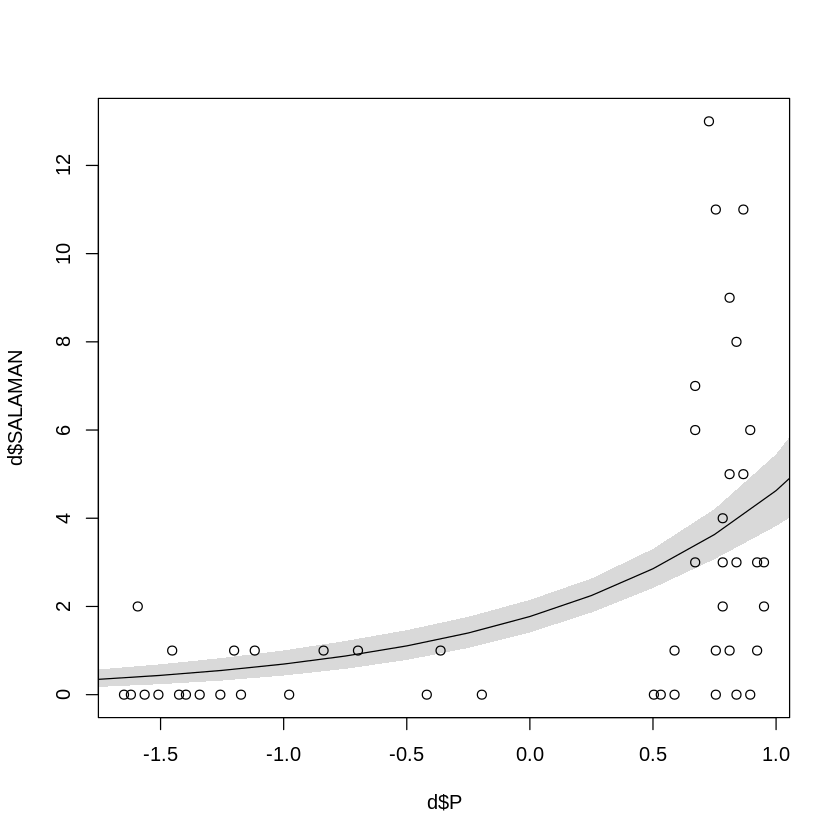

In [ ]:
P_seq <- seq(from=-3, to=3, length=25)
sim_means <- link(m_ulam, data=list(P=P_seq))
sim_PI <- apply(sim_means, 2, PI)

plot(d$SALAMAN ~ d$P)
lines(colMeans(sim_means) ~ P_seq)
shade(sim_PI, P_seq)

Our model seems to be doing a decent job of fitting the mean.  However, the data is much more variable than is captured by our Poisson model.  We could try to play with the priors, but later we'll learn about a different model that is more capable of capturing this variability.

##### Answer to 11H3, b
***Can you improve the model by using the other predictor, `FORESTAGE`? Try any models you think useful. Can you explain why `FORESTAGE` helps or does not help with prediction?***

Since the Poisson model is log-linear, the terms are effectively multiplied together.  Because of this, we should expect the addition of another term to make the prior permissive of more extreme value.  So we need to tighten this up.

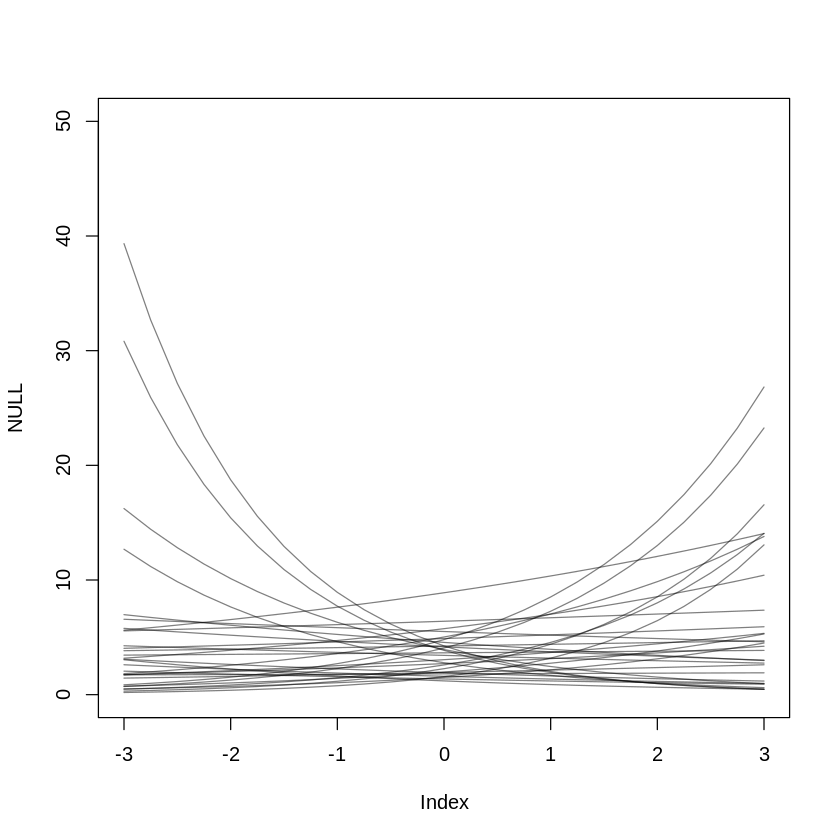

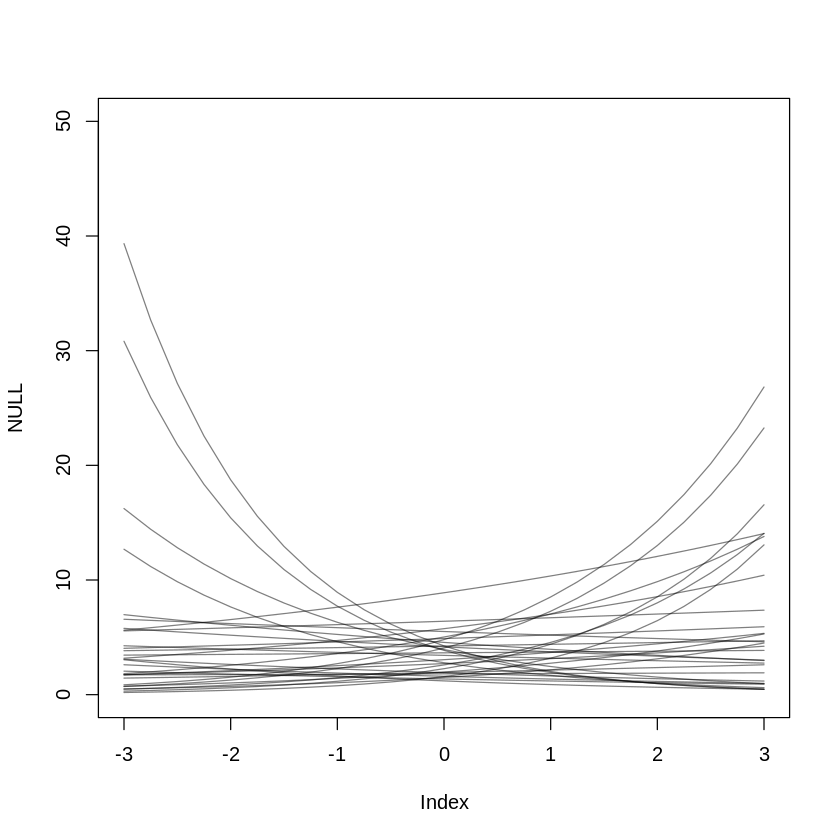

In [ ]:
n <- 30
a_prSim <- rnorm(n, 1, 0.5)
bP_prSim <- rnorm(n, 0, 0.3)
bF_prSim <- rnorm(n, 0, 0.3)

P_sim <- seq(from=-3 , to=3 , length.out=25)
F_sim <- seq(from=-3, to=3, length.out=25)


plot( NULL , xlim=c(-3,3) , ylim=c(0,50))
for (i in 1:n){
  lines(P_sim, exp(a_prSim[i] + bP_prSim[i]*P_sim + bF_prSim[i]*F_sim) , col=col.alpha("black", 0.5))
}
plot( NULL , xlim=c(-3,3) , ylim=c(0,50))
for (i in 1:n){
  lines(F_sim, exp(a_prSim[i] + bP_prSim[i]*P_sim + bF_prSim[i]*F_sim) , col=col.alpha("black", 0.5))
}

In [ ]:
model2 <- alist(
  SALAMAN ~ dpois(lambda),
    log(lambda) <- a + bP*P + bF*F,
      a ~ dnorm(1, 0.5),
      bP ~ dnorm(0, 0.3),
      bF ~ dnorm(0, 0.3)
)

m_ulam2 <- ulam(model2, data=d, chains=4, cores=4)

round(precis(m_ulam2),4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.6102,0.1162,0.4168,0.7866,1.0103,767.3105
bP,0.8373,0.1428,0.6149,1.0749,1.0083,888.0435
bF,0.0505,0.0902,-0.0967,0.1942,1.0017,1175.4990


Doesn't seem to make much of a difference.  Why?  Probably because `FORESTAGE` is confounded by `PCTCOVER`...older areas may tend to have more ground cover.

Let's plot the two model overtop of one another.

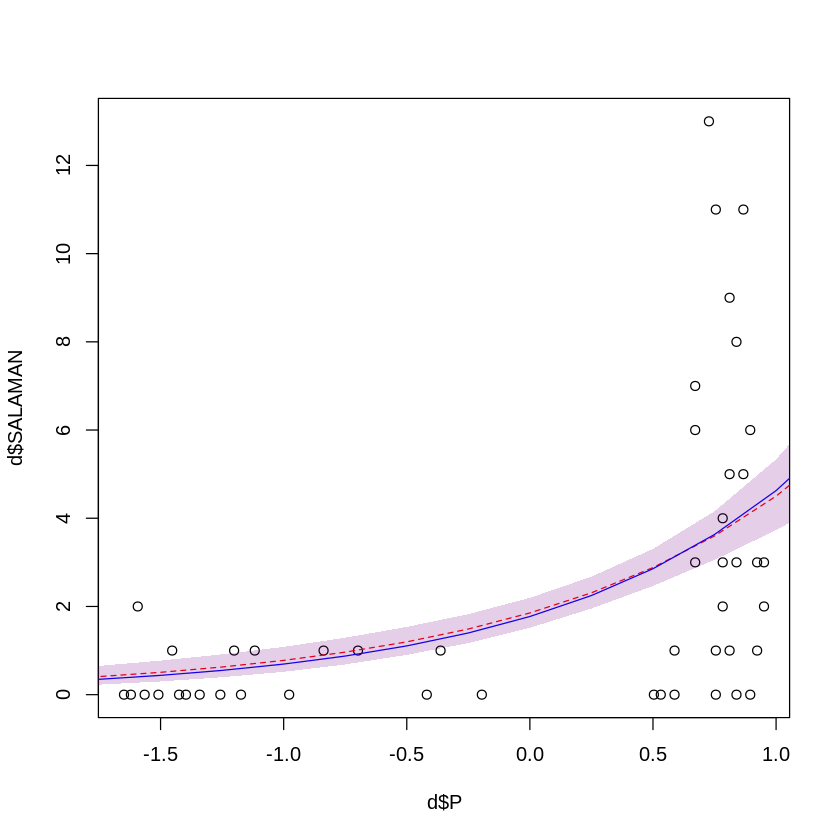

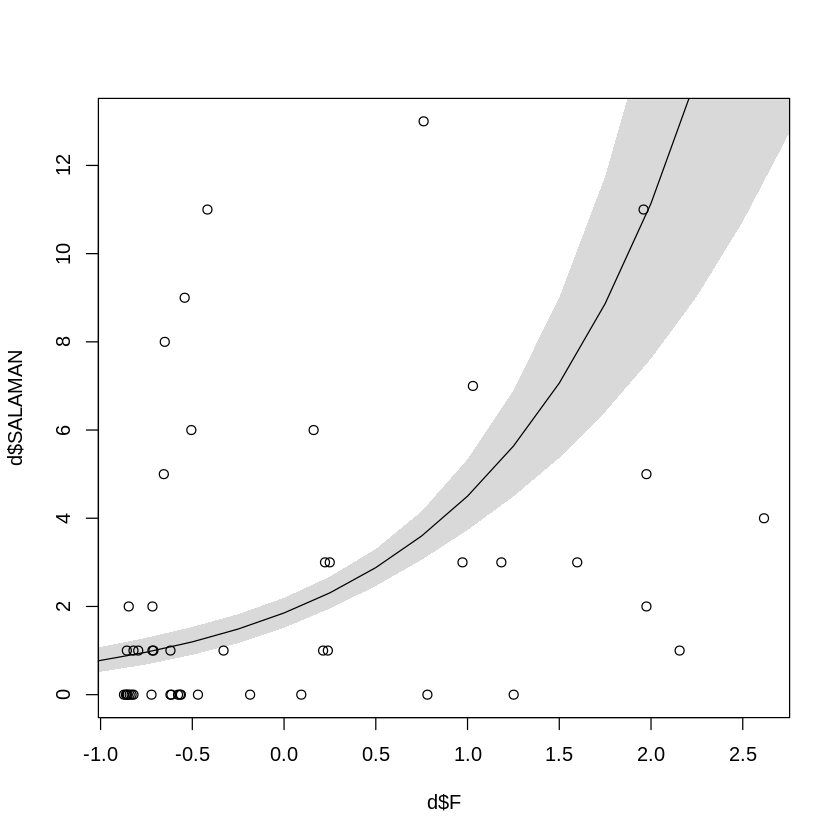

In [ ]:
P_seq <- seq(from=-3, to=3, length.out=25)
F_seq <- seq(from=-3, to=3, length.out=25)
sim_means2 <- link(m_ulam2, data=list(P=P_seq, F=F_seq))
sim_PI2 <- apply(sim_means2, 2, PI)

plot(d$SALAMAN ~ d$P)
lines(colMeans(sim_means2) ~ P_seq, lty=2, col="red")
lines(colMeans(sim_means) ~ P_seq, col="blue")
shade(sim_PI2, P_seq, col=col.alpha("red", 0.1))
shade(sim_PI2, P_seq, col=col.alpha("blue", 0.1))

plot(d$SALAMAN ~ d$F)
lines(colMeans(sim_means2) ~ F_seq)
shade(sim_PI2, F_seq)

### 11H4

The data in `data(NWOGrants)` are outcomes for scientific funding applications for the Netherlands Organization for Scientific Research (NWO) from 2010–2012 (see van der Lee and Ellemers (2015) for data and context). These data have a very similar structure to the `UCBAdmit` data discussed in the chapter. I want you to consider a similar question: *What are the total and indirect causal effects of gender on grant awards?* Consider a mediation path (a pipe) through discipline. Draw the  corresponding DAG and then use one or more binomial GLMs to answer the question. What is your  causal interpretation? If NWO’s goal is to equalize rates of funding between men and women, what type of intervention would be most effective?

#### Answer

Let's load the data.

In [7]:
data(NWOGrants)
d <- NWOGrants
head(d)

,discipline,gender,applications,awards
,<fct>,<fct>,<int>,<int>
1,Chemical sciences,m,83,22
2,Chemical sciences,f,39,10
3,Physical sciences,m,135,26
4,Physical sciences,f,39,9
5,Physics,m,67,18
6,Physics,f,9,2


Now for the DAG.  We're meant to consider `discipline` as a causal element of `award`/`applications`.  We're further meant to consider that `gender` may affect `award`/`applications` both directly and indirectly via `discipline`.  This implies the following DAG.

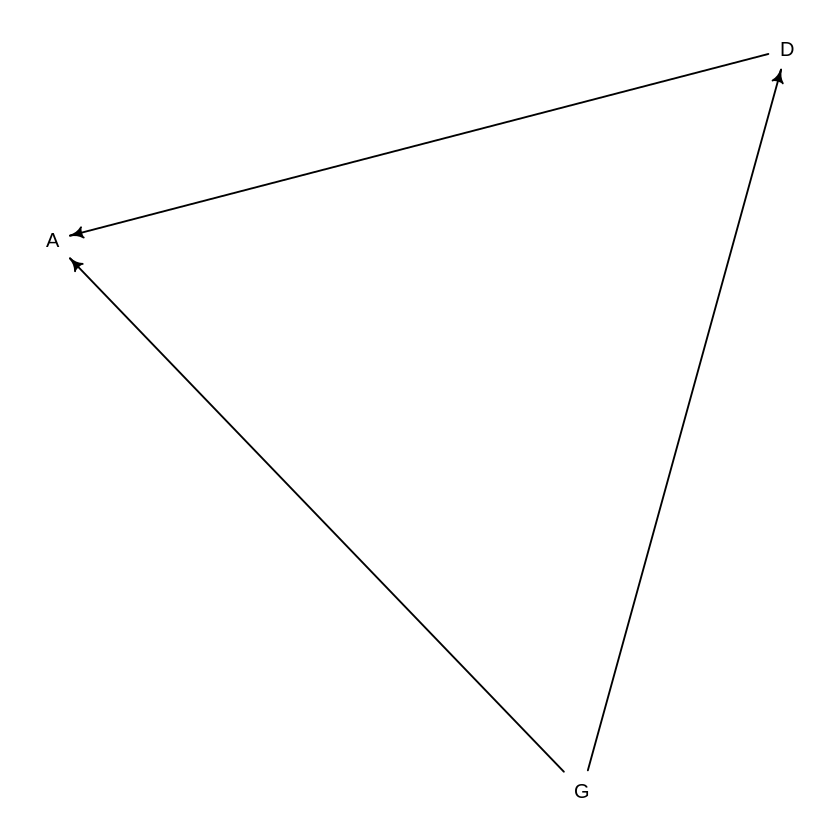

In [8]:
library(dagitty)

NWO_DAG <- dagitty("dag{
  G -> D -> A
  G -> A
}")

drawdag(NWO_DAG)

Now we'll try to model the effects of `gender`.  We're asked to use binomial models, so we'll definitely do that, but we can also apply a Poisson model with offset--so we'll also do that.

To drill down on `gender` effects, we'll run a model that does NOT condition on `discipline` to get the total effect of `gender`, and a second model that DOES condition on `discipline` to get the direct effect on gender.

In [9]:
d_list <- list(awards=d$awards,
               applications=d$applications,
               discipline=as.integer(d$discipline),
               gender=ifelse(d$gender=="m", 1L, 2L))

In [10]:
m_binom_TE <- ulam(
  alist(
    awards ~ dbinom(applications, p),
      logit(p) <- aG[gender],
        aG[gender] ~ normal(0,1)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=1000
)

m_binom_DE <- ulam(
  alist(
    awards ~ dbinom(applications, p),
      logit(p) <- aG[gender] + aD[discipline],
        aG[gender] ~ normal(0,1),
        aD[discipline] ~ normal(0,1)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=2000
)

round(precis(m_binom_TE, depth=2), 4)
round(precis(m_binom_DE, depth=2), 4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aG[1],-1.5293,0.0626,-1.6270,-1.4288,1.0025,1404.706
aG[2],-1.7335,0.0839,-1.8764,-1.5979,1.0044,1376.136


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aG[1],-1.1410,0.3042,-1.6340,-0.6716,1.0044,429.3949
aG[2],-1.2804,0.3072,-1.7709,-0.8029,1.0044,448.1528
aD[1],0.1302,0.3501,-0.4200,0.6974,1.0040,566.2043
aD[2],-0.1939,0.3275,-0.7023,0.3415,1.0056,495.4323
aD[3],-0.4273,0.3232,-0.9161,0.0979,1.0044,487.7392
aD[4],-0.4635,0.3497,-1.0202,0.0891,1.0039,559.6083
aD[5],-0.5351,0.3198,-1.0298,-0.0193,1.0043,476.6093
aD[6],-0.2095,0.3470,-0.7427,0.3670,1.0030,565.7176
aD[7],0.1004,0.3856,-0.5115,0.7220,1.0009,630.8892


So there's our coefficient estimates.  To compare males vs females, we need to extract samples from the posteriors and set up contrasts.

In [11]:
post_binom_TE <- extract.samples(m_binom_TE)
post_binom_DE <- extract.samples(m_binom_DE)

TE_diff_binom <- inv_logit(post_binom_TE$aG[,1]) - inv_logit(post_binom_TE$aG[,2])
DE_diff_binom <- inv_logit(post_binom_DE$aG[,1]) - inv_logit(post_binom_DE$aG[,2])

round(precis(list(TE_diff=TE_diff_binom, DE_diff=DE_diff_binom), hist=FALSE), 4)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
TE_diff,0.0278,0.0140,0.005,0.0513
DE_diff,0.0245,0.0194,-0.005,0.0571


The total effect is estimated to favor males by ~ 2.8% pts.

Once we account for `discipline`, the direct effect is roughly similar (~2.4%), but the the 89% CrI straddles 0 (albeit, somewhat unevenly).

Let's analyze this again, but with a Poisson model with offset.

In [12]:
m_Pois_TE <- ulam(
  alist(
    awards ~ dpois(lambda),
      log(lambda) <- log(applications) + aG[gender],
        aG[gender] ~ normal(0,1)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=1000
)

m_Pois_DE <- ulam(
  alist(
    awards ~ dpois(lambda),
      log(lambda) <- log(applications) + aG[gender] + aD[discipline],
        aG[gender] ~ normal(0,1),
        aD[discipline] ~ normal(0,1)
  ), data=d_list,
     chains=4,
     cores=4,
     iter=2000
)

round(precis(m_Pois_TE, depth=2), 4)
round(precis(m_Pois_DE, depth=2), 4)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aG[1],-1.7243,0.0581,-1.8170,-1.6352,1.0032,1100.859
aG[2],-1.8939,0.0786,-2.0183,-1.7681,1.0031,1146.502


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
aG[1],-1.3355,0.2997,-1.8163,-0.8392,1.0109,387.7263
aG[2],-1.4506,0.3044,-1.9392,-0.9521,1.0099,400.5022
aD[1],0.0143,0.3394,-0.5365,0.5553,1.0077,494.5110
aD[2],-0.2375,0.3229,-0.7700,0.2800,1.0103,413.8024
aD[3],-0.4282,0.3141,-0.9437,0.0822,1.0108,422.8992
aD[4],-0.4585,0.3366,-1.0078,0.0808,1.0068,500.5349
aD[5],-0.5148,0.3139,-1.0285,-0.0073,1.0094,426.2749
aD[6],-0.2510,0.3348,-0.7907,0.2905,1.0088,482.2491
aD[7],-0.0127,0.3604,-0.5926,0.5529,1.0064,583.9418


In [13]:
post_Pois_TE <- extract.samples(m_Pois_TE)
post_Pois_DE <- extract.samples(m_Pois_DE)

TE_diff_Pois <- exp(post_Pois_TE$aG[,1]) - exp(post_Pois_TE$aG[,2])
DE_diff_Pois <- exp(post_Pois_DE$aG[,1]) - exp(post_Pois_DE$aG[,2])

round(precis(list(TE_diff=TE_diff_Pois, DE_diff=DE_diff_Pois), hist=FALSE), 4)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
TE_diff,0.0276,0.0158,0.0020,0.0523
DE_diff,0.0296,0.0285,-0.0109,0.0770


Comparing this to the binomial models, we get similar results.

### 11H5

Suppose that the NWO Grants sample has an unobserved confound that influences both  choice of discipline and the probability of an award. One example of such a confound could be the  career stage of each applicant. Suppose that in some disciplines, junior scholars apply for most of the  grants. In other disciplines, scholars from all career stages compete. As a result, career stage influences  discipline as well as the probability of being awarded a grant.

* Add these influences to your DAG from  the previous problem.
* What happens now when you condition on discipline?
* Does it provide an unconfounded estimate of the direct path from gender to an award? Why or why not? Justify your answer with the backdoor criterion.

If you have trouble thinking this though, try simulating fake data, assuming your DAG is true. Then analyze it using the model from the previous problem.

* What do you conclude?
* Is it possible for gender to have a real direct causal influence but for a regression conditioning on both gender and discipline to suggest zero influence?

#### Answers

We'll piggyback off of the previous question, so make sure you've ran that code.

First, we'll amend our previous DAG according to the question.  The question suggests that career stage (S) affects both application/award (A) and discipline (D).  But that S → D seems wrong to me; I imagine these are either independent of that the direction of causality goes the other way, S ← D.  So I'm going to assume this instead.  It also seems plausible that G → S.

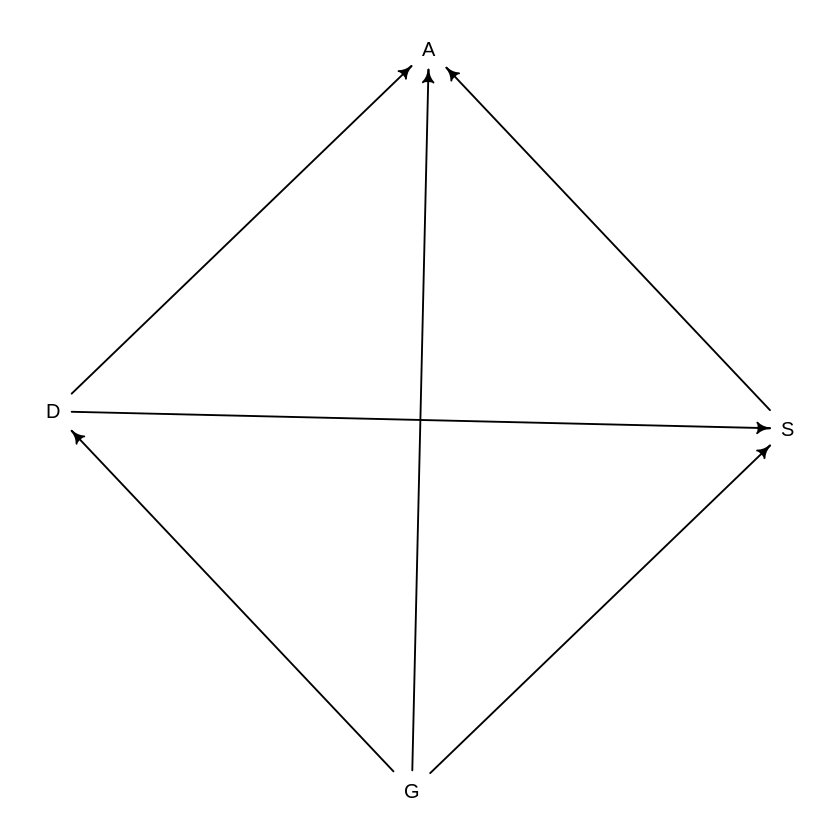

In [26]:
library(dagitty)

NWO_DAG <- dagitty("dag{
  S <- G -> D -> A
  G -> A <- S <- D
}")

drawdag(NWO_DAG)

I think, given these assumptions, that we'll always get an unbiased estimated of the effect of G on A; total effect if we don't condition on anything else and direct effect if we condition on D and S.  But interpretting DAGs can become difficult.  Already, I'm having trouble keeping all of the pieces in my head.  For instance, will conditioning on the collider at S cause a biased estimate?  This is where simulation is important.

In [65]:
n <- 1000
G <- rbern(n=n, p=0.6) # male=1, female=0
D <- rbern(n=n, p=inv_logit(G)) +
     rbern(n=n, p=inv_logit(G)) # make 3 different disciplines
S <- runif(n=n, min=0, max=inv_logit(G + D))
A <- rbern(n=n, p=inv_logit(1 + 1*G + D + 1.1*S))

sim_dat <- list(G=as.integer(G), D=as.integer(D+1), S=S, A=A)
str(sim_dat)

List of 4
 $ G: int [1:1000] 1 0 0 1 0 1 0 0 1 0 ...
 $ D: int [1:1000] 3 2 2 2 2 2 3 2 2 2 ...
 $ S: num [1:1000] 0.668 0.528 0.342 0.234 0.206 ...
 $ A: int [1:1000] 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
sim_mod1 <- ulam(
  alist(
    A ~ dbinom(1, p),
      logit(p) <- a_G*G,
        a_G ~ dnorm(0,1)
  ), data=sim_dat,
     chains=4,
     cores=4
)

sim_mod2 <- ulam(
  alist(
    A ~ dbinom(1, p),
      logit(p) <- a_G*G + a_D[D],
        a_G ~ dnorm(0,1),
        a_D[D] ~ dnorm(0,1)
  ), data=sim_dat,
     chains=4,
     cores=4
)

sim_mod3 <- ulam(
  alist(
    A ~ dbinom(1, p),
      logit(p) <- a_G*G + a_D[D] + b_S*S,
        a_G ~ dnorm(0,1),
        a_D[D] ~ dnorm(0,1),
        b_S ~ dnorm(0,1)
  ), data=sim_dat,
     chains=4,
     cores=4
)

In [67]:
round(precis(sim_mod1, depth=2), 2)
round(precis(sim_mod2, depth=2), 2)
round(precis(sim_mod3, depth=2), 2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_G,3.71,0.26,3.32,4.12,1,591.21


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_G,1.63,0.32,1.14,2.16,1,1615.87
a_D[1],0.98,0.20,0.66,1.31,1,2067.30
a_D[2],2.02,0.21,1.70,2.36,1,2037.21
a_D[3],2.95,0.34,2.44,3.52,1,1653.94


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a_G,1.56,0.32,1.04,2.09,1,1542.20
a_D[1],0.84,0.23,0.46,1.22,1,1197.85
a_D[2],1.81,0.29,1.36,2.27,1,935.36
a_D[3],2.76,0.40,2.12,3.42,1,1182.70
b_S,0.63,0.54,-0.20,1.52,1,833.89


Across each model, `a_G` is the advantage of gender.

NEED TO FINISH THIS